# Multiple Output Text Classification
---
Original: [Jcharis](https://www.youtube.com/watch?v=Vzh7V4UNC1E&list=WL&index=1)

## Materi
* Binary Classification: Mempunyai target antara 0 atau 1
* Multi-Class: Klasifikasi yang terdiri lebih dari dua kelas
* Multi-Label: Klasifikasi yang memungkinkan suatu target memiliki dua label pada saat bersamaan
* Multi-Output: Setiap target memiliki multiple classification/regression labels
    * Multiclass-multioutput (Multitask classification) adalah suatu pengklasifikasian yang mana label setiap sampel terdiri dari non binary
    * Keduanya memiliki properti dan target lebih dari dua
    
## Ilustrasi

![ilustrasi](https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/MultiOutput_Text_Classification_with_ScikitLearn/MultiOutputvsMulti-Label-JCharisTech.png)

In [1]:
# Mengimport modules untuk melakukan EDA
import pandas as pd
import numpy as np

# Mengimport modules untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimport modules untuk ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Mengimport modules untuk ekstraksi features text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Mengimport modules tambahan
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
# Mengimport dataset
df = pd.read_csv("https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/MultiOutput_Text_Classification_with_ScikitLearn/data/netflix_titles_dataset.csv")

In [3]:
df.head() # Menampilkan lima baris pertama

,Unnamed: 0,title,description,type,rating
0,0,3%,In a future where the elite inhabit an island ...,TV Show,TV-MA
1,1,7:19,After a devastating earthquake hits Mexico Cit...,Movie,TV-MA
2,2,23:59,"When an army recruit is found dead, his fellow...",Movie,R
3,3,9,"In a postapocalyptic world, rag-doll robots hi...",Movie,PG-13
4,4,21,A brilliant group of students become card-coun...,Movie,PG-13


In [5]:
df = df[['title', 'description', 'type', 'rating']] # Menginputkan hanya data penting saja

In [6]:
df.head() # Menampilkan lima baris pertama

,title,description,type,rating
0,3%,In a future where the elite inhabit an island ...,TV Show,TV-MA
1,7:19,After a devastating earthquake hits Mexico Cit...,Movie,TV-MA
2,23:59,"When an army recruit is found dead, his fellow...",Movie,R
3,9,"In a postapocalyptic world, rag-doll robots hi...",Movie,PG-13
4,21,A brilliant group of students become card-coun...,Movie,PG-13


### Target
type and rating (Multiple-Class and Multiple-Label)

In [7]:
# Memeriksa distribusi kelas 1 untuk type
df['type'].value_counts()

Movie      4788
TV Show    2143
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

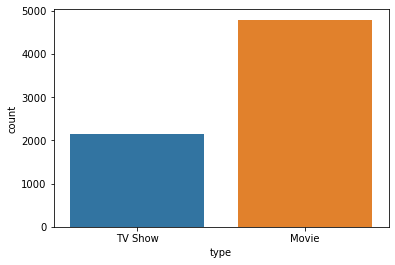

In [11]:
sns.countplot(x='type', data=df) # Memvisualisasikan distribusi kelas 1

In [12]:
# Memeriksa distribusi kelas 2 untuk rating
df['rating'].value_counts()

TV-MA    2863
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

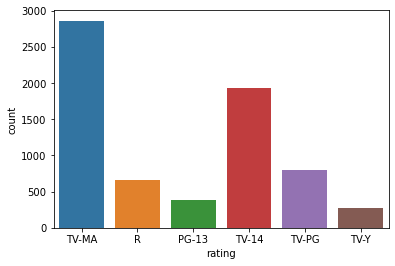

In [13]:
sns.countplot(x='rating', data=df) # Memvisualisasikan distribusi kelas 2

In [16]:
# Mengimport modules untuk multi output classifier
from sklearn.multioutput import MultiOutputClassifier

# Mengimport modules untuk text cleaning
import neattext.functions as nfx

In [17]:
df['title'] = df['title'].str.lower()

In [18]:
df

,title,description,type,rating
0,3%,In a future where the elite inhabit an island ...,TV Show,TV-MA
1,7:19,After a devastating earthquake hits Mexico Cit...,Movie,TV-MA
2,23:59,"When an army recruit is found dead, his fellow...",Movie,R
3,9,"In a postapocalyptic world, rag-doll robots hi...",Movie,PG-13
4,21,A brilliant group of students become card-coun...,Movie,PG-13
...,...,...,...,...
6926,zozo,When Lebanon's Civil War deprives Zozo of his ...,Movie,TV-MA
6927,zubaan,A scrappy but poor boy worms his way into a ty...,Movie,TV-14
6928,zulu man in japan,"In this documentary, South African rapper Nast...",Movie,TV-MA
6929,zumbo's just desserts,Dessert wizard Adriano Zumbo looks for the nex...,TV Show,TV-PG


In [21]:
# Features and labeling
X_features = df['title']
y_labels = df[['type', 'rating']]

In [22]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

## Membuat model pipeline

In [23]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()),
                          ('lr_multi', MultiOutputClassifier(LogisticRegression()))])

In [24]:
# Fitting dataset
pipe_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [25]:
# Nilai akurasi
pipe_lr.score(X_test, y_test)

0.27108868060562363

In [31]:
# Prediksi sampel
a = X_test.iloc[0]
b = y_test.iloc[0]
print("Title:", a)
print("Actual Predictions:\n", b)

Title: maddman: the steve madden story
Actual Predictions:
 type      Movie
rating    TV-MA
Name: 3429, dtype: object


In [28]:
ex1 = X_test.iloc[0]

In [29]:
ex1

'maddman: the steve madden story'

In [30]:
pipe_lr.predict([ex1])

array([['Movie', 'TV-14']], dtype=object)

In [32]:
# Probabilitas Prediksi
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

[array(['Movie', 'TV Show'], dtype=object), array(['PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'TV-Y'], dtype=object)]


[array([[0.84274788, 0.15725212]]),
 array([[0.05119787, 0.11936689, 0.40552151, 0.28809848, 0.12503893,
         0.01077633]])]

## Mencoba pipeline yang lain

* KNN
* NB
* DT

In [36]:
pipe_knn = Pipeline(steps=[('cv', CountVectorizer()),
                          ('knn', MultiOutputClassifier(KNeighborsClassifier()))])

pipe_nb = Pipeline(steps=[('cv', CountVectorizer()),
                          ('nb', MultiOutputClassifier(MultinomialNB()))])

pipe_dt = Pipeline(steps=[('cv', CountVectorizer()),
                          ('dt', MultiOutputClassifier(DecisionTreeClassifier()))])

In [37]:
print("Melatih model dari KNN")
pipe_knn.fit(X_train, y_train)

print("Melatih model dari Naive Bayes")
pipe_nb.fit(X_train, y_train)

print("Melatih model dari Decision Tree")
pipe_dt.fit(X_train, y_train)

Melatih model dari KNN
Melatih model dari Naive Bayes
Melatih model dari Decision Tree


Pipeline(steps=[('cv', CountVectorizer()),
                ('dt',
                 MultiOutputClassifier(estimator=DecisionTreeClassifier()))])

In [38]:
# Melakukan prediksi pada movies 1
print("Hasil dari pipeline KNN:\n",pipe_knn.predict([ex1]))
print("Hasil dari pipeline NB:\n",pipe_nb.predict([ex1]))
print("Hasil dari pipeline DT:\n",pipe_dt.predict([ex1]))

Hasil dari pipeline KNN:
 [['Movie' 'R']]
Hasil dari pipeline NB:
 [['Movie' 'TV-14']]
Hasil dari pipeline DT:
 [['Movie' 'TV-MA']]


It looks like, Decision Tree could answer the questions

## Prediksi kedua

In [44]:
a = X_test.iloc[100]
b = y_test.iloc[100]
print("Title:", a)
print("Actual Predictions:\n", b)

Title: fall girls
Actual Predictions:
 type      Movie
rating    TV-14
Name: 1893, dtype: object


In [45]:
ex2 = X_test.iloc[100]

In [46]:
# Melakukan prediksi pada movies 2
print("Hasil dari pipeline LR:\n",pipe_lr.predict([ex2]))
print("Hasil dari pipeline KNN:\n",pipe_knn.predict([ex2]))
print("Hasil dari pipeline NB:\n",pipe_nb.predict([ex2]))
print("Hasil dari pipeline DT:\n",pipe_dt.predict([ex2]))

Hasil dari pipeline LR:
 [['Movie' 'TV-MA']]
Hasil dari pipeline KNN:
 [['Movie' 'TV-14']]
Hasil dari pipeline NB:
 [['Movie' 'TV-MA']]
Hasil dari pipeline DT:
 [['Movie' 'TV-MA']]


Here is better KNN

In [48]:
# Probabilitas Prediksi
print(pipe_nb.classes_)
pipe_nb.predict_proba([ex1])

[array(['Movie', 'TV Show'], dtype='<U7'), array(['PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'TV-Y'], dtype='<U5')]


[array([[0.93609409, 0.06390591]]),
 array([[0.00937823, 0.03988518, 0.56759152, 0.32339977, 0.05859355,
         0.00115175]])]

## Memeriksa nilai akurasi

In [50]:
# Nilai akurasi
print("LR:",pipe_lr.score(X_test, y_test))
print("KNN:",pipe_knn.score(X_test, y_test))
print("NB:",pipe_nb.score(X_test, y_test))
print("DT:",pipe_dt.score(X_test, y_test))

LR: 0.27108868060562363
KNN: 0.23720259552992068
NB: 0.277577505407354
DT: 0.2581110310021629


Well it's great to use Naive Bayes in this case although the accuracy is only 27%